In [6]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.7 MB 3.8 MB/s            
     |████████████████████████████████| 503 kB 12.5 MB/s            


In [675]:
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab as pl

In [676]:
colnames=['day', 'time', 'tide'] 
df = pd.read_fwf(r'ASTR19_S22_group_project_data.txt', header=None, skiprows=(0,1,2), names=colnames)
df.head()

,day,time,tide
0,1,8:07,6.57
1,1,15:37,-0.39
2,2,8:55,5.38
3,2,16:25,-1.74
4,3,9:45,5.26


In [677]:
ts = '1:07'
min = sum(int(x) * 60 ** i for i, x in enumerate(reversed(ts.split(':'))))
print(min)

67


In [678]:
def timeto_min(ts):
  '''
  takes a string representng the tiume and returns minutes from start of day
  '''
  minutes = sum(int(x) * 60 ** i for i, x in enumerate(reversed(ts.split(':'))))
  return minutes

In [679]:
h= df['day']
h = 24 * 60 * h
ti= df['time']
ti = np.array(list(map(timeto_min, ti)))

In [680]:
x = h+ti
x = x/60
#x now represents hours

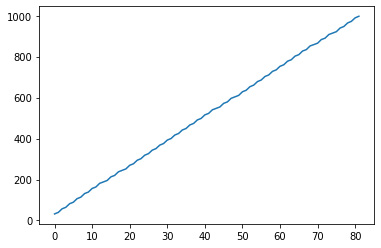

In [681]:
plt.plot(x)

In [682]:
y= df['tide']
y_error = np.full(len(y), .25)

In [683]:
x[1:50]

1      39.616667
2      56.916667
3      64.416667
4      81.750000
5      89.233333
6     106.583333
7     114.000000
8     131.466667
9     138.766667
10    156.366667
11    163.516667
12    181.400000
13    188.266667
14    195.366667
15    213.016667
16    220.116667
17    237.766667
18    244.833333
19    251.966667
20    269.516667
21    276.933333
22    294.133333
23    301.750000
24    318.783333
25    326.416667
26    343.366667
27    351.000000
28    367.983333
29    375.566667
30    392.566667
31    400.133333
32    417.166667
33    424.683333
34    441.750000
35    449.200000
36    466.350000
37    473.750000
38    490.950000
39    498.250000
40    515.633333
41    522.800000
42    540.416667
43    547.333333
44    554.366667
45    571.866667
46    578.966667
47    596.500000
48    603.616667
49    610.733333
Name: day, dtype: float64

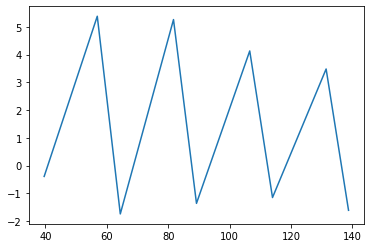

In [684]:
plt.plot(x[1:10],y[1:10])

In [685]:
#moving average of data
pd.options.mode.chained_assignment = None
df['tideavg'] = df['tide'].rolling(2).mean()
first2mean = np.mean([df['tideavg'][1], df['tideavg'][2]])
df['tideavg'][0] = first2mean

In [686]:
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

,day,time,tide,tideavg
0,1,8:07,6.57,2.7925
1,1,15:37,-0.39,3.0900
2,2,8:55,5.38,2.4950
3,2,16:25,-1.74,1.8200
4,3,9:45,5.26,1.7600
...,...,...,...,...
77,39,11:15,3.26,3.2900
78,40,4:29,5.21,4.2350
79,40,12:22,2.39,3.8000
80,41,5:21,4.83,3.6100


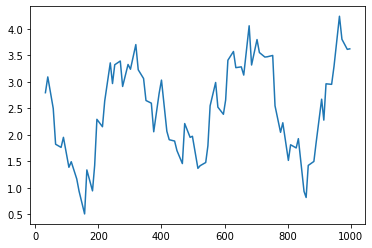

In [687]:
plt.plot(x,df['tideavg'])

In [688]:
#code taken from class

def f_line(x,a,b,c,d):
  return a * np.sin(b*x + c) + d

params, paramscov = optimize.curve_fit(f_line, x, df['tideavg'], sigma=y_error, p0 = [1,.02,1000,2] )

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]


print(a_fit, b_fit, c_fit, d_fit)

1.1160472860886843 0.017909149002312687 1001.2677333501678 2.5332126919823446


In [689]:
avg_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit
#y_fit = 1 * np.sin(.00035 * x + 1000) + 2

In [690]:
params, paramscov = optimize.curve_fit(f_line, x, df['tide'], sigma=y_error, p0 = [1,.02,1000,2] )

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]


tide_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit
df['fit'] = tide_fit

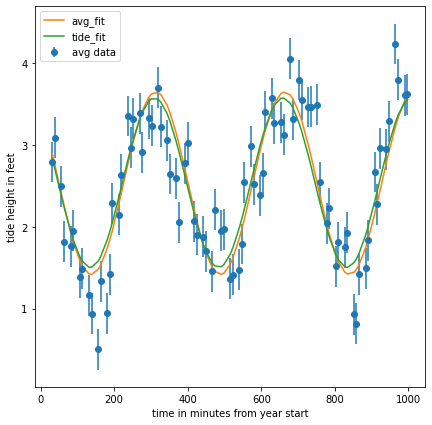

In [691]:
f = plt.figure(figsize = (7,7))
plt.errorbar(x,df['tideavg'], yerr = y_error, fmt = 'o', label = 'avg data')
plt.plot(x,avg_fit, label = 'avg_fit')
plt.plot(x,tide_fit, label = 'tide_fit')
plt.xlabel('time in minutes from year start')
plt.ylabel('tide height in feet')
plt.legend()

In [692]:
df['residuals'] = df['tide'] - df['fit']
df['residuals_avg'] = df['tideavg'] - df['fit']

In [693]:
df['residuals']

0     3.739986
1    -3.083536
2     3.007738
3    -3.976194
4     3.313193
        ...   
77    0.242707
78    1.934898
79   -0.980897
80    1.311555
81   -1.146622
Name: residuals, Length: 82, dtype: float64

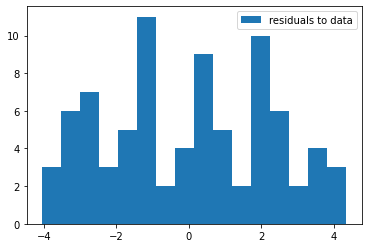

In [694]:
plt.hist(df['residuals'], 16, label = 'residuals to data')
#plt.hist(df['residuals_avg'], label = 'residuals to avg')

plt.legend()

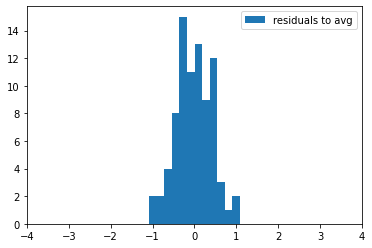

In [695]:
#plt.hist(df['residuals'], label = 'residuals to data')
plt.hist(df['residuals_avg'],12, label = 'residuals to avg')
plt.xlim(-4, 4)
plt.legend()

In [696]:
df['residuals'].std()

2.2843386688151415

In [697]:
df['residuals_avg'].std()

0.42855356091227464

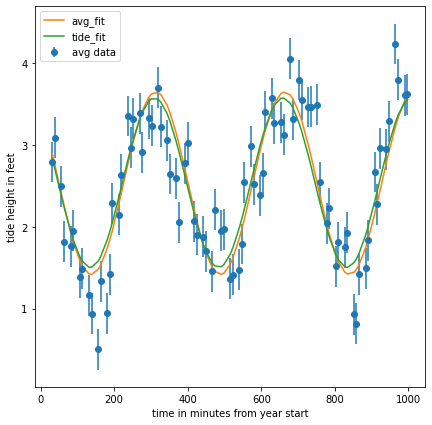

In [698]:
f = plt.figure(figsize = (7,7))
plt.errorbar(x,df['tideavg'], yerr = y_error, fmt = 'o', label = 'avg data')
plt.plot(x,avg_fit, label = 'avg_fit')
plt.plot(x,tide_fit, label = 'tide_fit')
plt.xlabel('time in minutes from year start')
plt.ylabel('tide height in feet')
plt.legend()

## Attempt using two sine waves added to each other

In [699]:
##now lets try and make it have a sinusoidal wave as an amplitude to get intra day variation

def ef_line(x,a,b,c,d, alpha, beta, gamma):
  return alpha*np.sin(beta*x + gamma) + (a * np.sin(b*x + c)) + d

params, paramscov = optimize.curve_fit(ef_line, x, df['tideavg'], sigma=y_error, p0 = [1.4,.02,-.1,2.1,-2,1,.1] )

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
alpha_fit = params[4]
beta_fit = params[5]
gamma_fit = params[6]

print(a_fit, b_fit, c_fit, d_fit,alpha_fit, beta_fit, gamma_fit)
dd_fit = (alpha_fit*np.sin(beta_fit*x + gamma_fit)) + (a_fit * np.sin(b_fit*x + c_fit)) + d_fit
#dd_fit =  -2*(np.sin(1*x + 1)) + 1.12* np.sin(.017 * x+2.22) + 2.5

1.1956770282854214 0.017618135689733312 2.4356530782658203 2.5633419577626975 -0.21262493821194722 0.9969873054075932 3.0899010716884128


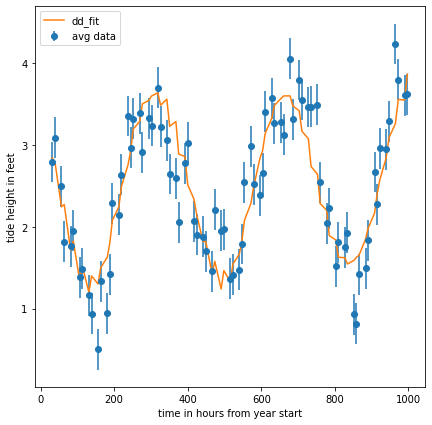

In [700]:
f = plt.figure(figsize = (7,7))
plt.errorbar(x,df['tideavg'], yerr = y_error, fmt = 'o', label = 'avg data')
plt.plot(x,dd_fit, label = 'dd_fit')
#plt.plot(x,tide_fit, label = 'tide_fit')
plt.xlabel('time in hours from year start')
plt.ylabel('tide height in feet')
plt.legend()

## Lets try a new form
I think something of the form $sin(x) * sin(y) + sin(x) $ might work well

In [701]:
##now lets try and make it have a sinusoidal wave as an amplitude to get intra day variation

def three_sine(x, int_amp, int_freq1, int_offset1, int_freq2, int_offset2, ext_amp,ext_freq, ext_offset, vert_offset):
  return  (int_amp * np.sin(int_freq1*x + int_offset1) * np.sin(int_freq2*x + int_offset2)) + (ext_amp * np.sin(ext_freq*x + ext_offset)) + vert_offset * x

params, paramscov = optimize.curve_fit(three_sine, x, df['tide'], p0=[2,.4,1,16,1,1,1,2.22,2.5]  )#sigma=y_error, p0=[2,.4,0,1,0,1,.01,2.22,2.5]

int_amp_fit = params[0]
int_freq1_fit = params[1]
int_offset1_fit = params[2]
int_freq2_fit = params[3]
int_offset2_fit = params[4]
ext_amp_fit = params[5]
ext_freq_fit = params[6]
ext_offset_fit = params[7]
vert_offset_fit = params[8]

print(params)
tsine_fit = (int_amp_fit * np.sin(int_freq1_fit*x + int_offset1_fit) * np.sin(int_freq2_fit*x + int_offset2_fit)) + (ext_amp_fit * np.sin(ext_freq_fit*x + ext_offset_fit)) + vert_offset_fit * x


[2.22131348e+00 3.97151425e-01 5.48322150e+00 1.59973098e+01
 8.33336663e-01 1.43028857e+00 1.00503990e+00 1.44488830e+00
 4.64749812e-03]


In [702]:
#tsine_fit =   (1* np.sin(1*x + 1) * np.sin(1*x + 1)) + 1* np.sin(5* x+2.22) +.5

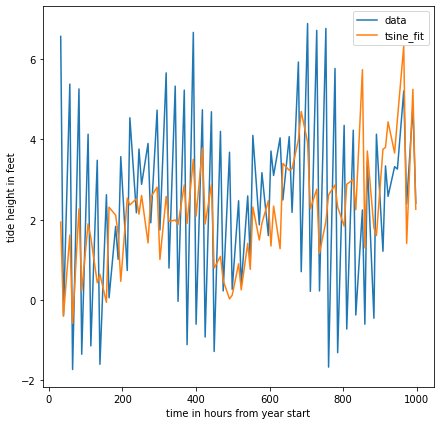

In [703]:
f = plt.figure(figsize = (7,7))
#plt.errorbar(x,df['tideavg'], yerr = y_error, fmt = 'o', label = 'avg data')
plt.plot(x,df['tide'], label = 'data')
plt.plot(x,tsine_fit, label = 'tsine_fit')
#plt.plot(x,tide_fit, label = 'tide_fit')
plt.xlabel('time in hours from year start')
plt.ylabel('tide height in feet')
plt.legend()

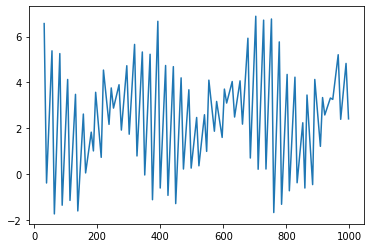

In [704]:
plt.plot(x,df['tide'], label = 'data')

## Now lets try some forier analysis

In [705]:

    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 43                 # number of harmonics in model according to NOAA
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = np.fft.fft(x_notrend)  # detrended x in frequency domain
    f = np.fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes = list(indexes)
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
#    x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
#    n_predict = 100
#    extrapolation = fourierExtrapolation(x, n_predict)
#    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
#    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
#    pl.legend()
#    pl.show()

In [706]:
mytides = df['tide']
n_predict = 100
extrapolation = fourierExtrapolation(mytides, n_predict)
xnew = fourierExtrapolation(x, n_predict)
len(xnew)

182

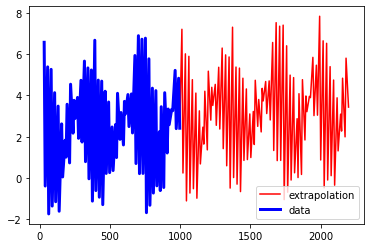

In [707]:
pl.plot(xnew, extrapolation, 'r', label = 'extrapolation')
pl.plot(x, mytides, 'b', label = 'data', linewidth = 3)
pl.legend()
pl.show()

In [708]:
df['hours'] = x

In [709]:
newdf = df.drop(['day', 'time', 'tideavg', 'fit', 'residuals', 'residuals_avg'], axis=1)

In [718]:
newdf.to_csv('tidedata.txt', encoding='utf-8', index=False)